In [123]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
from experiments.create_state import get_state
import matplotlib.pyplot as plt
from itertools import product
from datetime import datetime
from typing import Tuple
from compute_utils import (
    get_loaded_states,
    to_dataframe,
    compute_statistics,
    load_results)

%matplotlib inline

In [124]:
results_dir = "../results/COBYLA/ent/distributions"
run_range = list(range(1, 11))
#qubit_range = [3, 4, 5, 6, 7, 8]
qubit_range = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# EPS values are mapped separately
#eps_values = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
eps_values = [0.5, 0.1, 0.05, 0.01]

### Normal distribution $(\mu = 0.5, \sigma = 0.3)$

In [125]:
state_type = "normal"

In [126]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [127]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0244,0.0244,0.0000,0.0000
4,0.0270,0.0270,0.0056,0.0000
5,0.0263,0.0263,0.0064,0.0013
6,0.0256,0.0256,0.0065,0.0016
7,0.0252,0.0252,0.0064,0.0016
8,0.0250,0.0250,0.0064,0.0016
9,0.0249,0.0249,0.0064,0.0016
10,0.0249,0.0249,0.0063,0.0016
11,0.0248,0.0248,0.0063,0.0016


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0265,0.0265,0.0000,0.0000
4,0.0275,0.0275,0.0056,0.0000
5,0.0265,0.0265,0.7503,0.0013
6,0.0258,0.0258,0.0065,0.7501
7,0.0253,0.0253,0.5032,0.0016
8,0.0251,0.0251,0.0064,0.0016
9,0.0250,0.0250,0.0064,0.0016
10,0.0249,0.0249,0.0063,0.7504
11,0.0249,0.0249,0.7516,0.0016


In [128]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,True,True,False,False
4,True,True,False,False
5,True,True,True,False
6,True,True,False,True
7,True,True,True,False
8,True,True,False,False
9,True,True,False,False
10,False,False,False,True
11,True,True,True,False


In [129]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


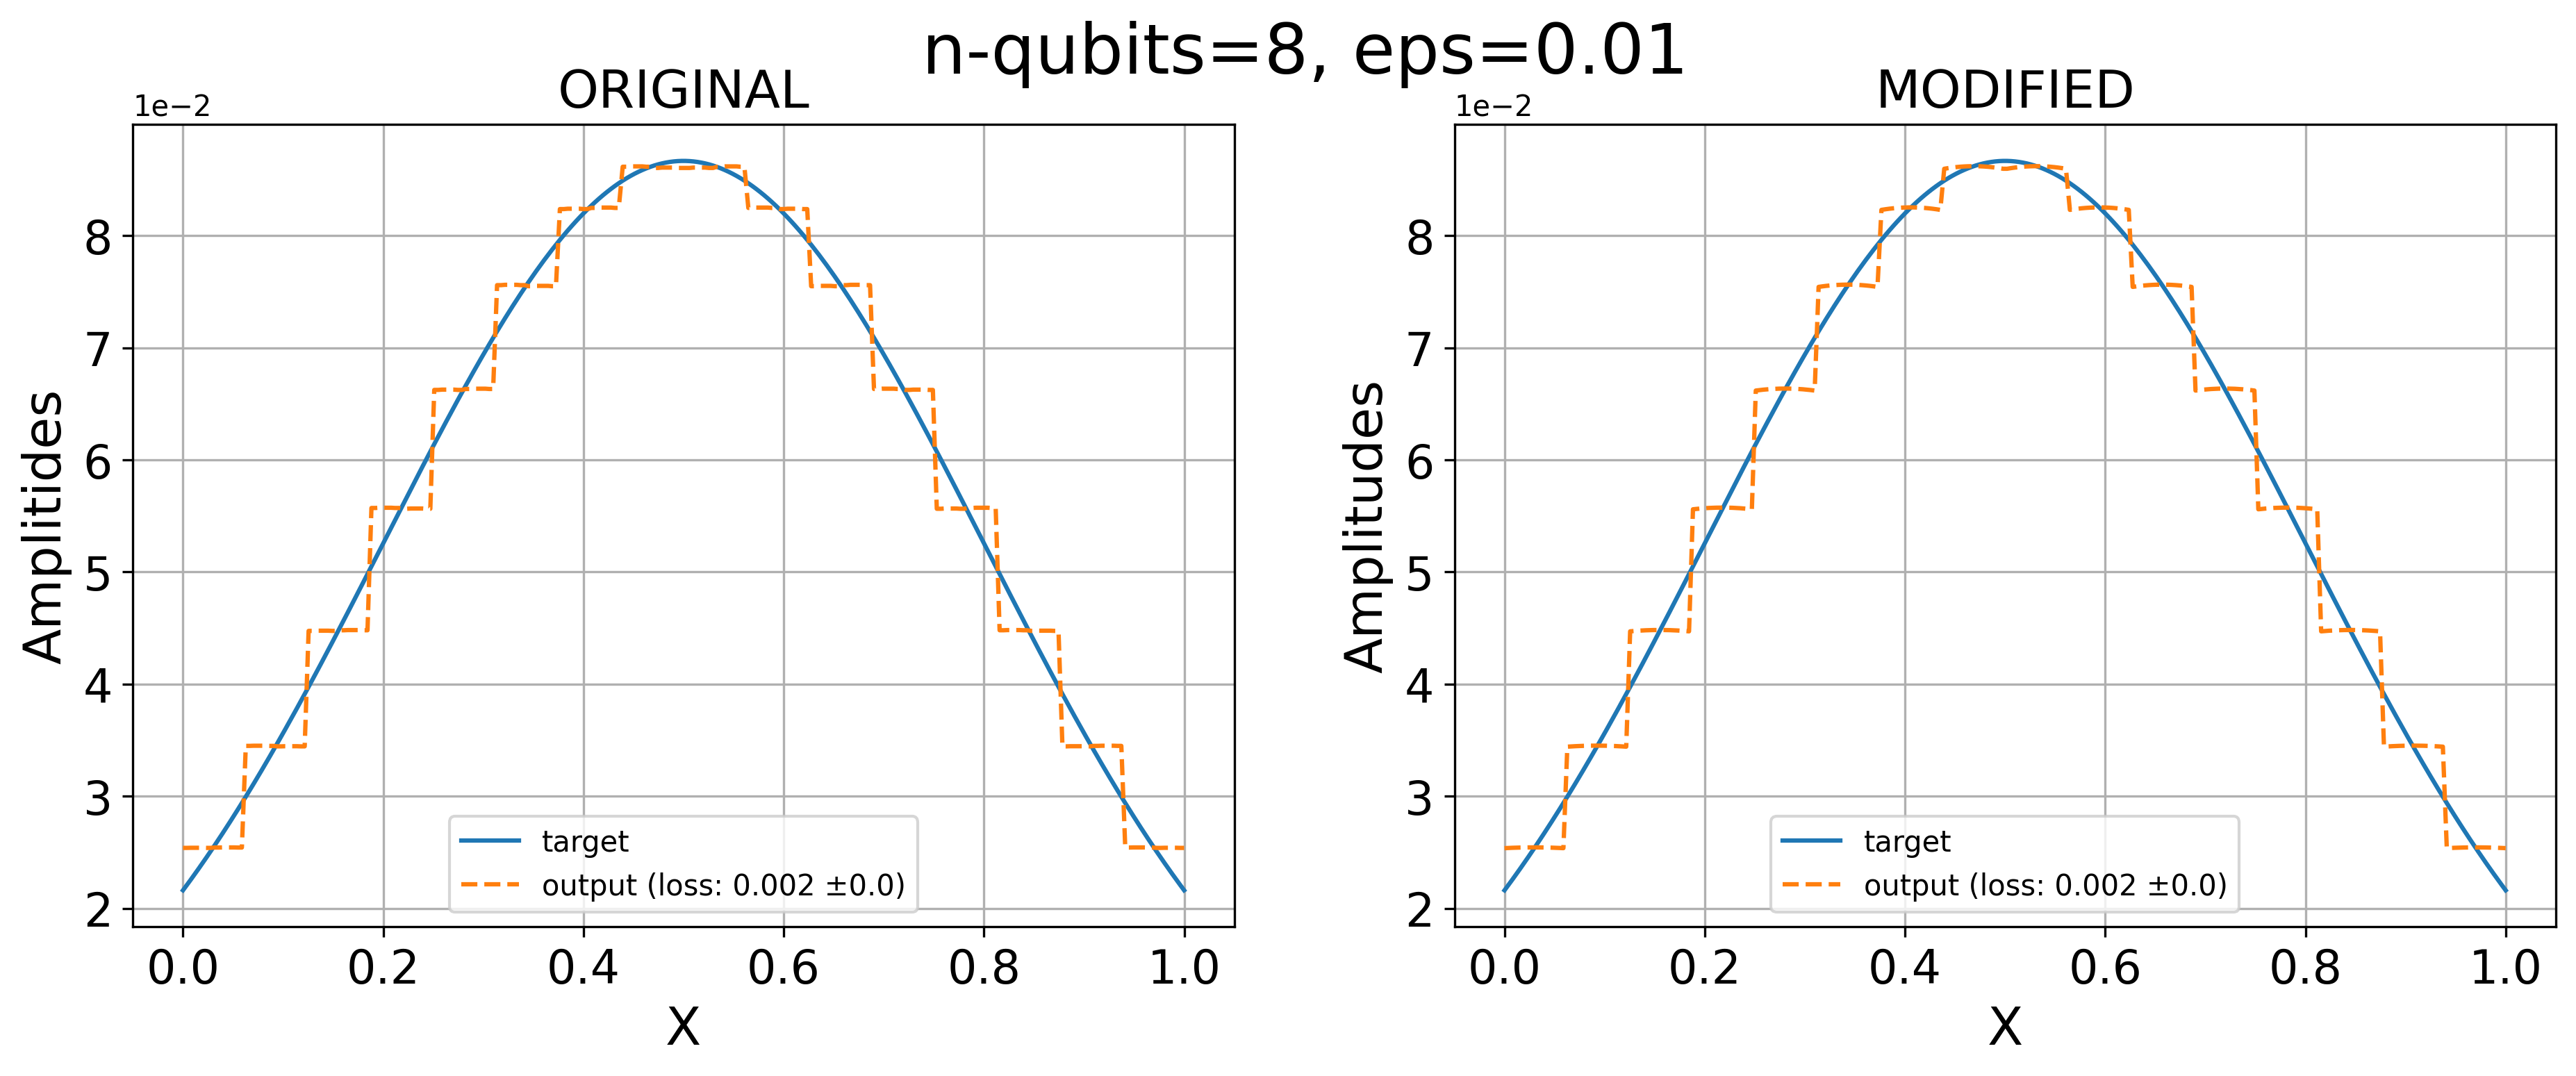

In [130]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc": 0.5, "scale": 0.3})

x_points = np.linspace(0, 1, 2**n_qubits)

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_state, label="target")
axes[0].plot(x_points, sv_mean_original, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("Amplitides", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_state, label="target")
axes[1].plot(x_points, sv_mean_modified, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("Amplitudes", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### $log$-Normal Distribution $(s= 1, \mu = 0.1, \sigma = 0.3)$

In [131]:
state_type = "lognormal"

In [132]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [133]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0810,0.0810,0.0000,0.0000
4,0.1287,0.1287,0.0334,0.0000
5,0.1313,0.1313,0.0308,0.0126
6,0.1265,0.1265,0.0264,0.0125
7,0.1236,0.1236,0.0245,0.0122
8,0.1221,0.1221,0.0236,0.0123
9,0.1213,0.1213,0.0231,0.0119
10,0.1209,0.1209,0.0229,0.0118
11,0.1207,0.1207,0.0228,0.0121


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1546,0.1546,0.0000,0.0000
4,0.2111,0.2111,0.0400,0.0000
5,0.2221,0.2221,0.7722,0.0135
6,0.2194,0.2194,0.0282,0.7529
7,0.2171,0.2171,0.5148,0.0131
8,0.2157,0.2157,0.0248,0.0129
9,0.2150,0.2150,0.0243,0.0126
10,0.2146,0.2146,0.0240,0.7532
11,0.2144,0.2144,0.7561,0.0124


In [134]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,True,True,False,False
4,True,True,True,False
5,True,True,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,True,True
10,True,True,True,True
11,True,True,True,True


In [135]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


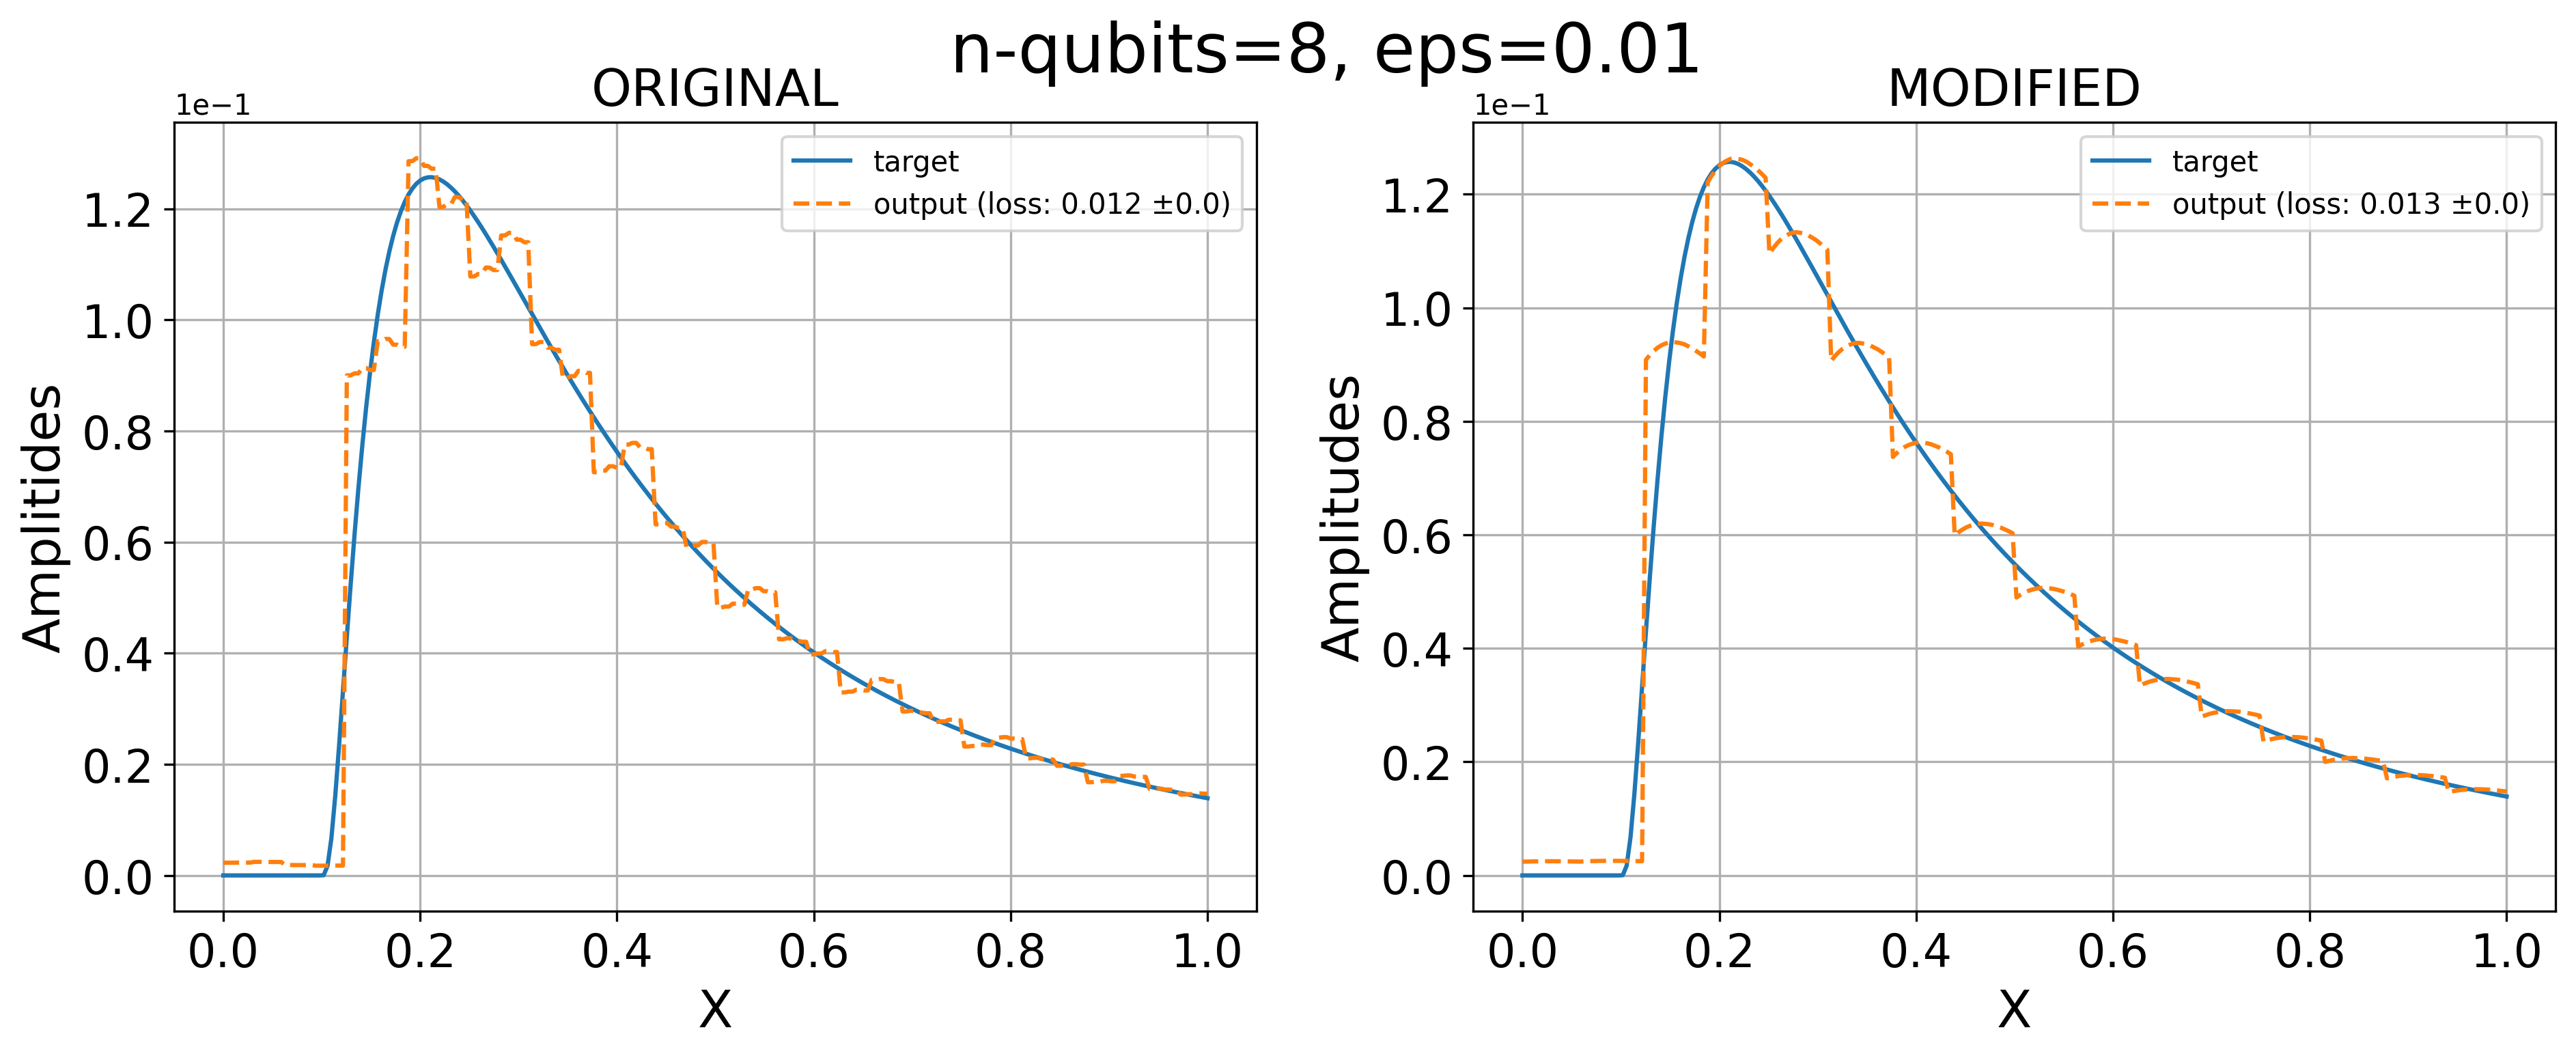

In [136]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "s": 1, "loc": 0.1, "scale": 0.3})

x_points = np.linspace(0, 1, 2**n_qubits)

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_state, label="target")
axes[0].plot(x_points, sv_mean_original, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("Amplitides", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_state, label="target")
axes[1].plot(x_points, sv_mean_modified, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("Amplitudes", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### Bimodal Distribution $(\mu_1 = 0.25, \sigma_1 = 0.1; \mu_2 = 0.75, \sigma_2 = 0.15)$

In [137]:
state_type = "bimodal"

In [138]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [139]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0307,0.0307,0.0000,0.0000
4,0.0612,0.0612,0.0326,0.0000
5,0.0631,0.0631,0.0372,0.0078
6,0.0621,0.0621,0.0378,0.0094
7,0.0612,0.0612,0.0376,0.0097
8,0.0607,0.0607,0.0374,0.0098
9,0.0604,0.0604,0.0373,0.0097
10,0.0602,0.0602,0.0373,0.0097
11,0.0601,0.0601,0.0372,0.0097


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1537,0.1537,0.0000,0.0000
4,0.1925,0.1925,0.0335,0.0000
5,0.1930,0.1930,0.7515,0.0078
6,0.1905,0.1905,0.0380,0.7511
7,0.1887,0.1887,0.5190,0.0097
8,0.1877,0.1877,0.0376,0.0097
9,0.1872,0.1872,0.0374,0.0097
10,0.1869,0.1869,0.0374,0.7525
11,0.1868,0.1868,0.7594,0.0097


In [140]:
display(df_stds_original)
display(df_stds_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0


In [141]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,True,True,False,False
4,True,True,True,False
5,True,True,True,False
6,True,True,True,True
7,True,True,True,False
8,True,True,True,False
9,True,True,True,False
10,True,True,True,True
11,True,True,True,False


In [142]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


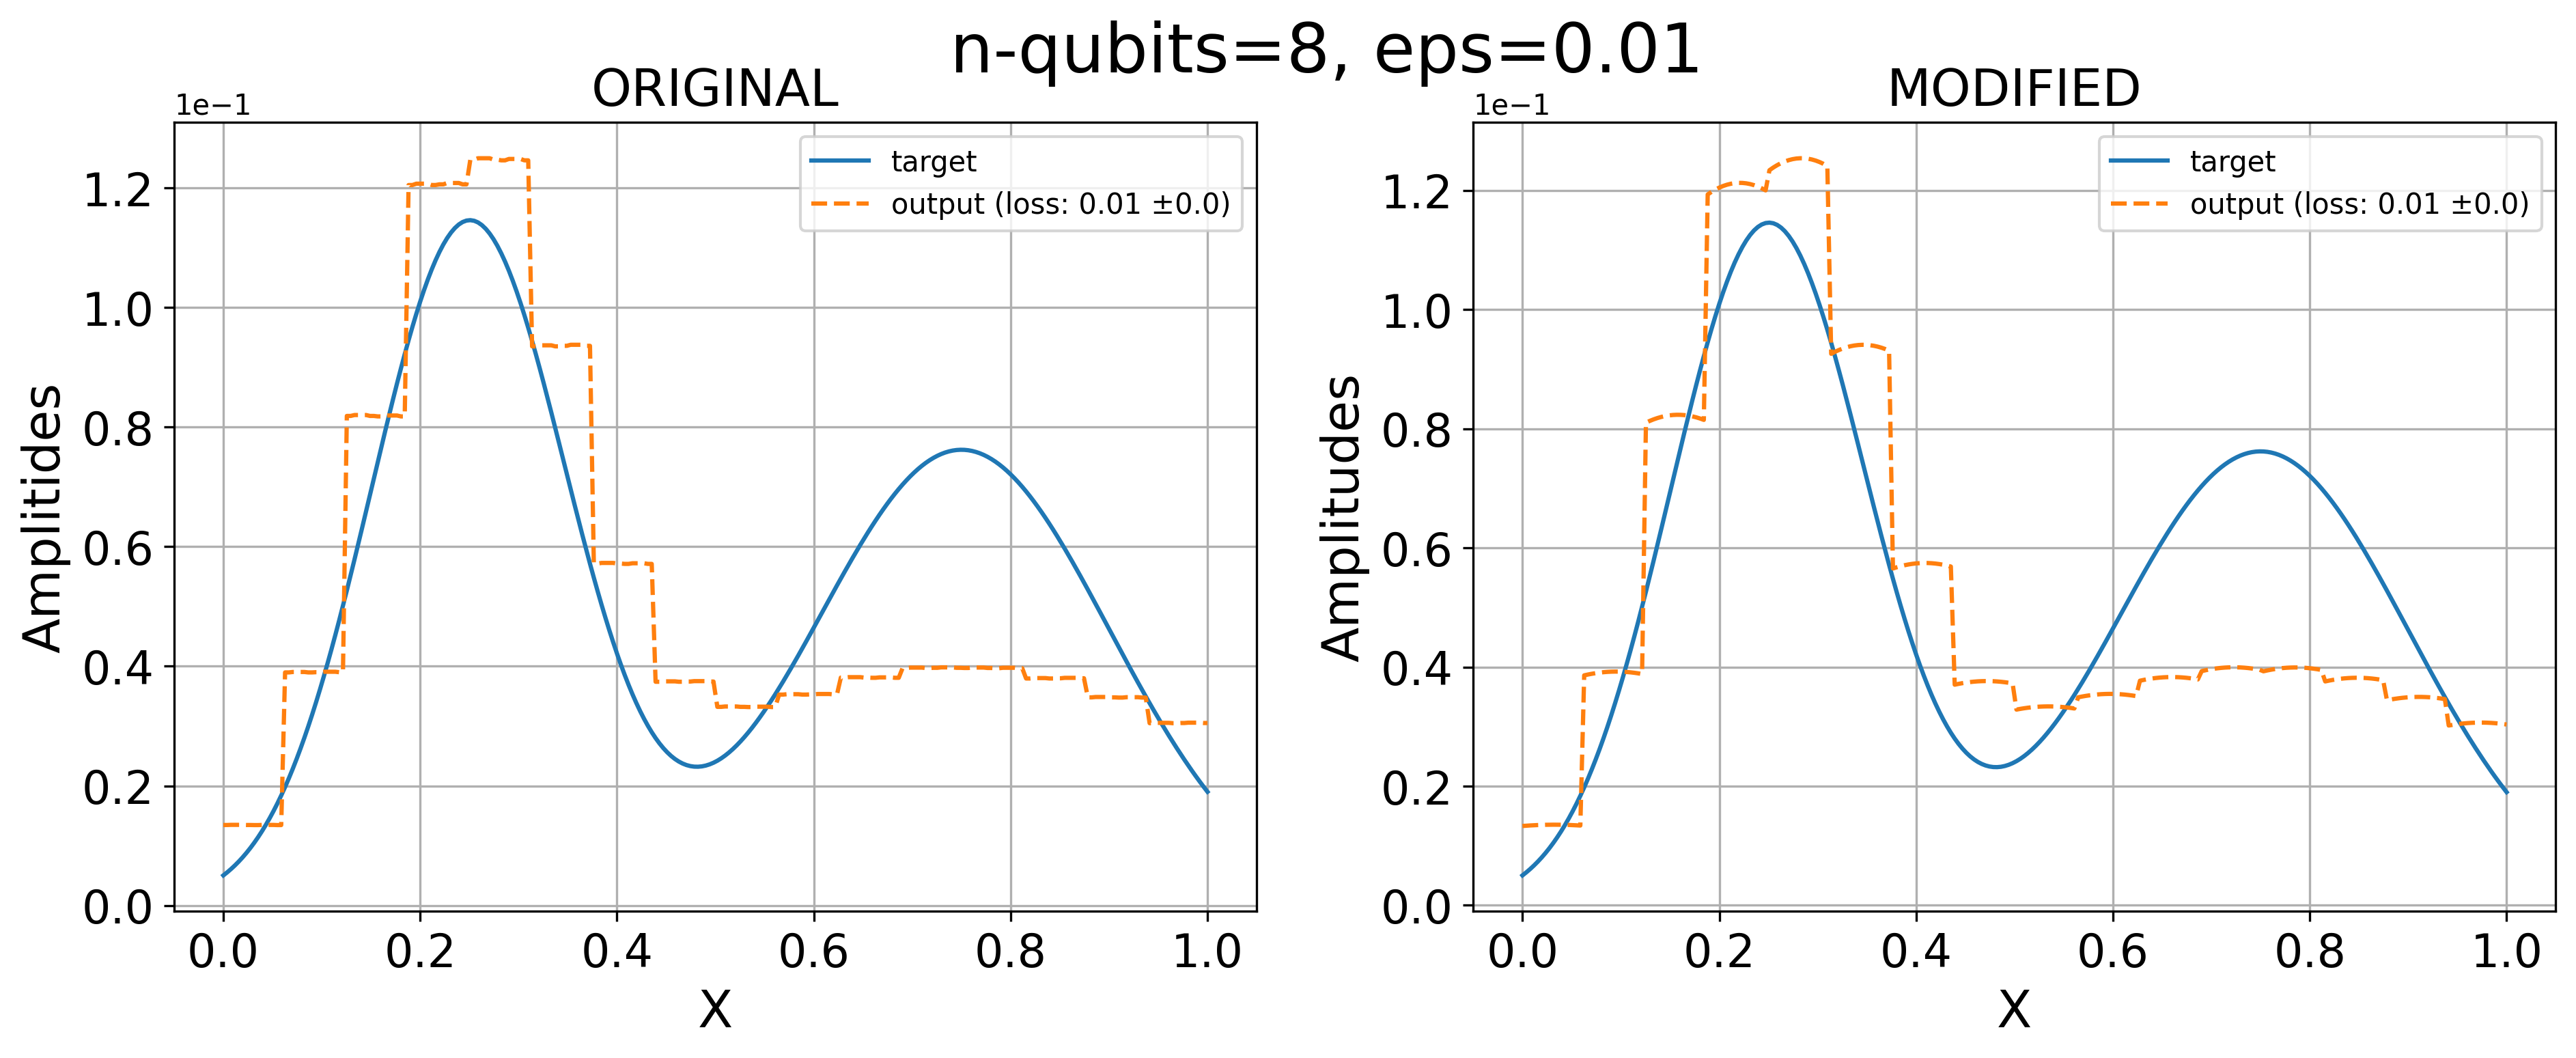

In [143]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc_bim1": 0.25, "scale_bim1": 0.1, "loc_bim2": 0.75, "scale_bim2": 0.15})


x_points = np.linspace(0, 1, 2**n_qubits)

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_state, label="target")
axes[0].plot(x_points, sv_mean_original, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("Amplitides", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_state, label="target")
axes[1].plot(x_points, sv_mean_modified, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("Amplitudes", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### Laplace $(\mu = 0.5, \sigma = 0.2)$

In [144]:
state_type = "laplace"

In [145]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [146]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0197,0.0197,0.0000,0.0000
4,0.0471,0.0471,0.0265,0.0000
5,0.0520,0.0520,0.0310,0.0058
6,0.0528,0.0528,0.0316,0.0072
7,0.0528,0.0528,0.0315,0.0075
8,0.0527,0.0527,0.0314,0.0075
9,0.0526,0.0526,0.0313,0.0075
10,0.0526,0.0526,0.0312,0.0075
11,0.0526,0.0526,0.0312,0.0075


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1051,0.1051,0.0000,0.0000
4,0.1153,0.1153,0.0265,0.0000
5,0.1149,0.1149,0.7375,0.0064
6,0.1132,0.1132,0.0316,0.7469
7,0.1120,0.1120,0.5155,0.0080
8,0.1114,0.1114,0.0313,0.0081
9,0.1110,0.1110,0.0313,0.0081
10,0.1109,0.1109,0.0312,0.7520
11,0.1108,0.1108,0.7578,0.0081


In [147]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,True,True,False,False
4,True,True,False,False
5,True,True,True,True
6,True,True,False,True
7,True,True,True,True
8,True,True,False,True
9,True,True,False,True
10,True,True,False,True
11,True,True,True,True


In [148]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ismael/anaconda3/envs/sanchez-env/lib/python3.9/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


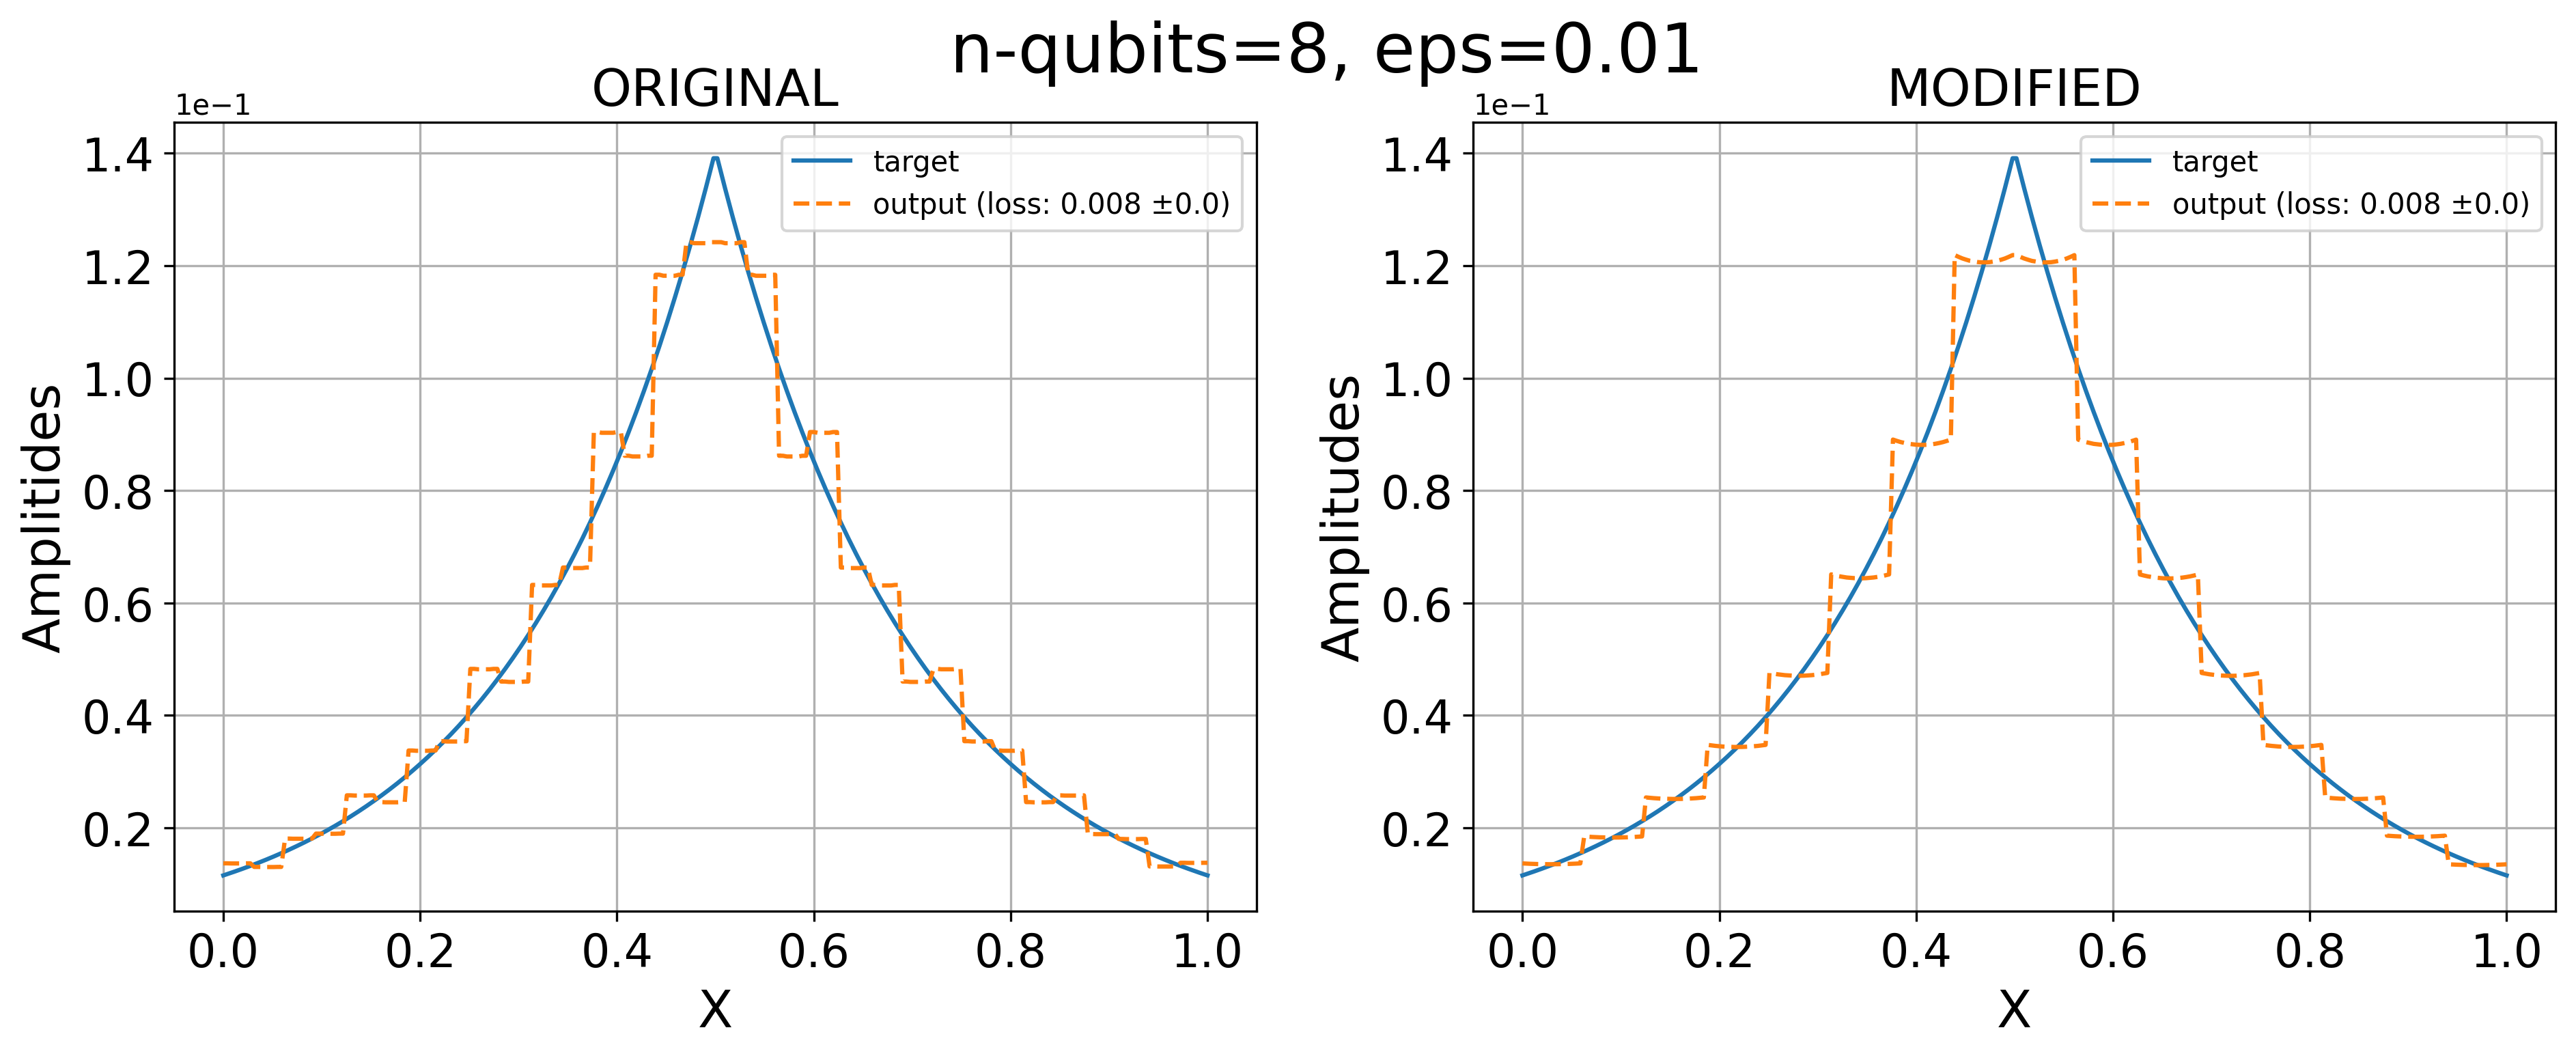

In [149]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc": 0.5, "scale": 0.2})


x_points = np.linspace(0, 1, 2**n_qubits)

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_state, label="target")
axes[0].plot(x_points, sv_mean_original, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("Amplitides", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_state, label="target")
axes[1].plot(x_points, sv_mean_modified, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("Amplitudes", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")